# GRIP : The Sparks Foundation         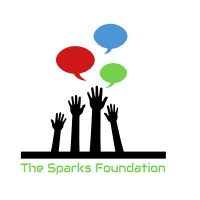

# Task 3 : Prediction using Decision Tree Algorithm
### Author : Salma Ferjeni

### In this task, we are going to create the decision tree classifier and visualize it graphically


In [2]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Importing data
iris_data = pd.read_csv("Iris.csv") #Iris.csv is now a pandas dataframe
iris_data.head(10) #prints first 10 values

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### Description of the Iris dataset

In [6]:
iris_data.shape

(150, 6)

In [7]:
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
#how many data points for each class are present?
iris_data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
#Knowing missing values
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

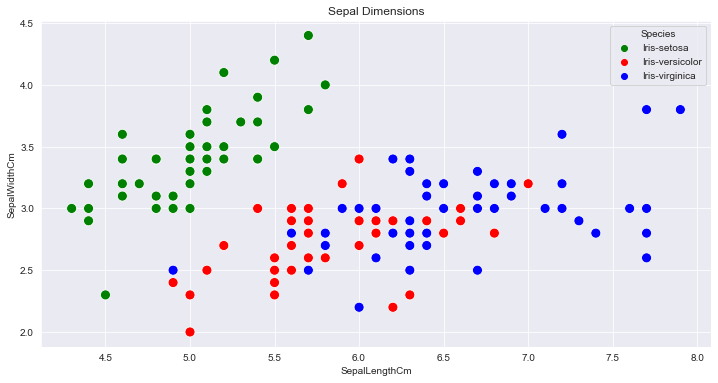

In [11]:
#Visualizing the sepal dimension
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.title('Sepal Dimensions')

sns.scatterplot(x=iris_data["SepalLengthCm"], 
                y=iris_data["SepalWidthCm"], 
                hue=iris_data["Species"],palette = ["green","red","blue"],
                s=100);

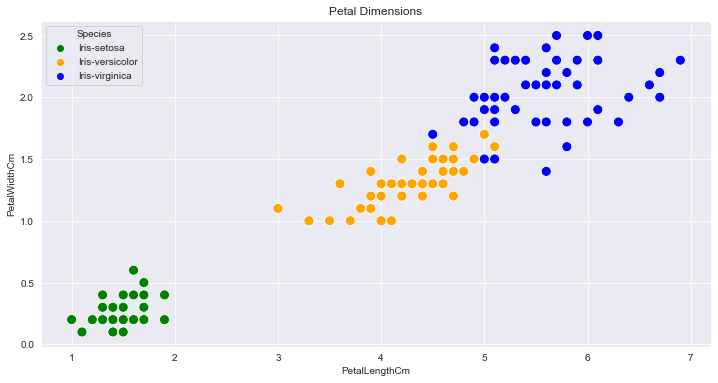

In [12]:
#Visualizing the petal dimension
plt.figure(figsize=(12, 6))
plt.title('Petal Dimensions')

sns.scatterplot(x=iris_data["PetalLengthCm"], 
                y=iris_data["PetalWidthCm"], 
                hue=iris_data["Species"],palette = ["green","orange","blue"],
                s=100);

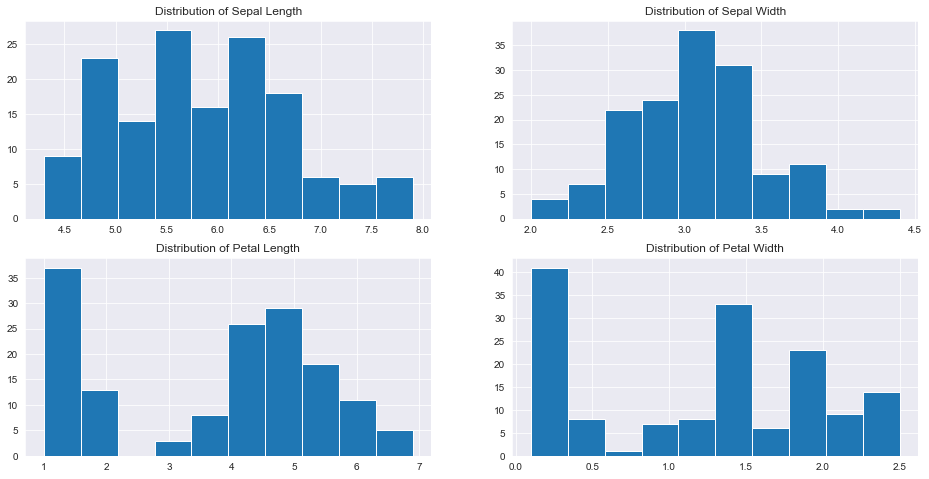

In [14]:
#Analyzing the distributions of sepal and petal dimensions
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

#plot for sepal length
axes[0,0].set_title('Distribution of Sepal Length')
axes[0,0].hist(iris_data["SepalLengthCm"]);

#plot for sepal width
axes[0,1].set_title('Distribution of Sepal Width')
axes[0,1].hist(iris_data["SepalWidthCm"]);

#plot for petal length
axes[1,0].set_title('Distribution of Petal Length')
axes[1,0].hist(iris_data["PetalLengthCm"]); 

#plot for petal width
axes[1,1].set_title('Distribution of Petal Width')
axes[1,1].hist(iris_data["PetalWidthCm"]);

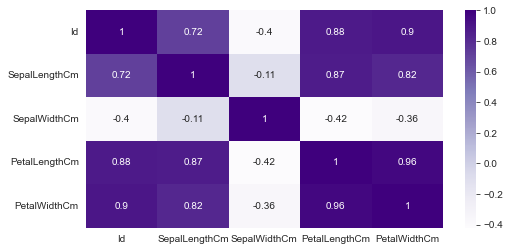

In [15]:
#Analyzing correlation between feature and Target
plt.figure(figsize=(8,4))
sns.heatmap(iris_data.corr(), annot=True, cmap='Purples');

### Splitting The Data into Training And Testing Dataset

In [16]:
#extract features and target variables
x = iris_data.drop(columns="Species")
y = iris_data["Species"]

In [17]:
#save the feature name and target variables
feature_names = x.columns
labels = y.unique()

In [18]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, test_x, y_train, test_lab = train_test_split(x,y,
                                                 test_size = 0.3,
                                                 random_state = 42)

### Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

### Let us visualize the Decision Tree to understand it better

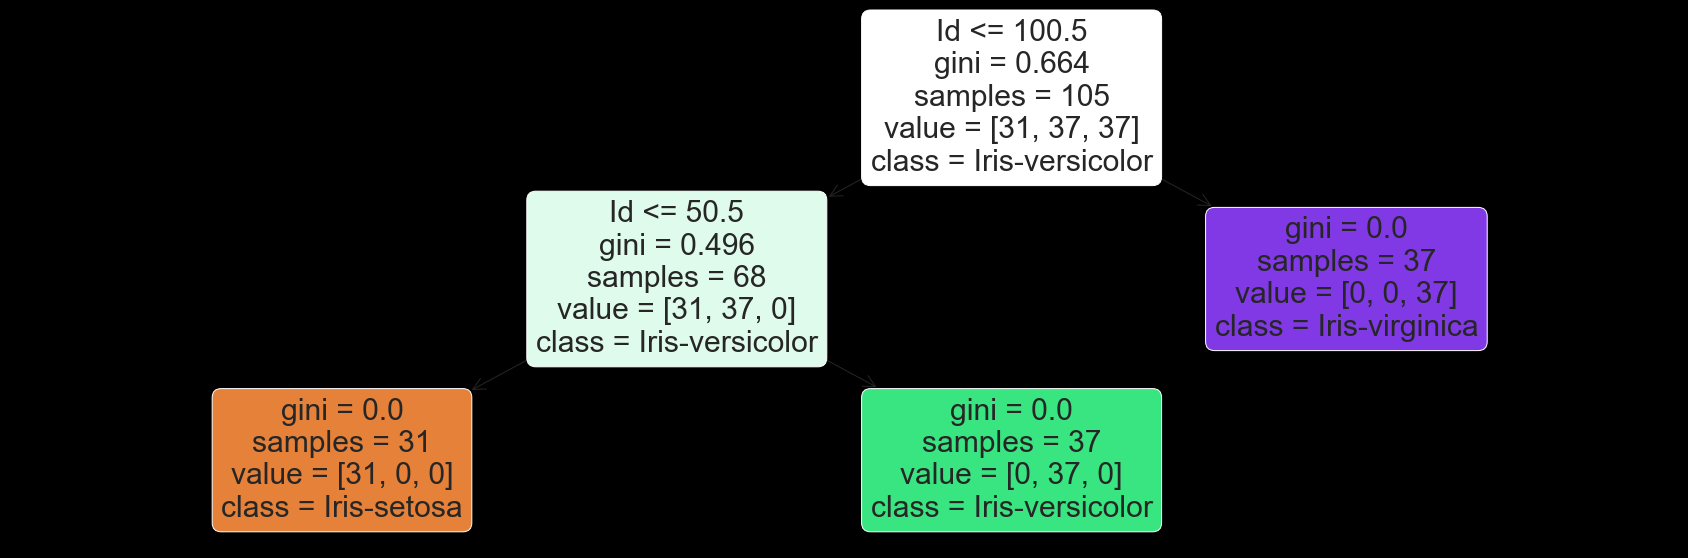

In [33]:
#import relevant packages
from sklearn import tree
import matplotlib.pyplot as plt
#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='k')
#create the tree plot
a = tree.plot_tree(clf,
                   #use the feature names stored
                   feature_names = feature_names,
                   #use the class names stored
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=30)
#show the plot
plt.show()

### As a text based diagram 

In [32]:
#import relevant functions
from sklearn.tree import export_text
#export the decision rules
tree_rules = export_text(clf,
                        feature_names = list(feature_names))
#print the result
print(tree_rules)

|--- Id <= 100.50
|   |--- Id <= 50.50
|   |   |--- class: Iris-setosa
|   |--- Id >  50.50
|   |   |--- class: Iris-versicolor
|--- Id >  100.50
|   |--- class: Iris-virginica

